In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from IPython.display import Image

# Reading the Data

In [2]:
#Setting working directory
os.chdir("F://MBA//Edwisor//project_santander")

In [3]:
#Reading data
data = pd.read_csv("train.csv")

# Understanding the Data

In [4]:
data.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
data.shape

(200000, 202)

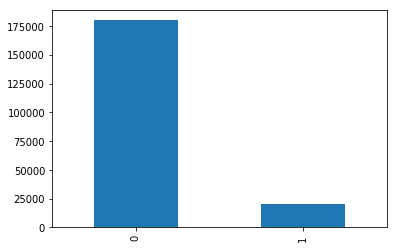

In [7]:
# Frequency of values of Target variable
data['target'].value_counts().plot(kind='bar')

In [8]:
# Missing value Analysis
data.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

# Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x81002b2080>,
 'caps': [<matplotlib.lines.Line2D at 0x81002b2710>,
 'boxes': [<matplotlib.lines.Line2D at 0x81002a6eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x81002b2da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x81002bc128>],
 'means': []}

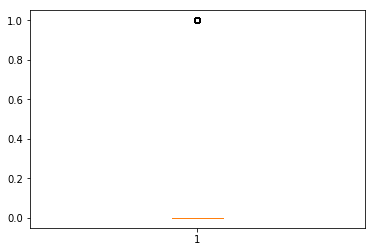

In [9]:
plt.boxplot(data['target'])

Text(0, 0.5, 'var_0')

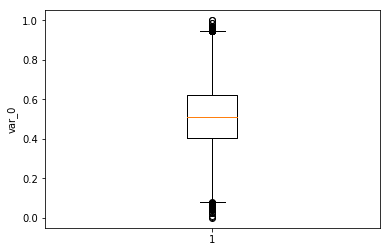

In [53]:
plt.boxplot(data['var_0'])
plt.ylabel('var_0')

Text(0, 0.5, 'Var_65')

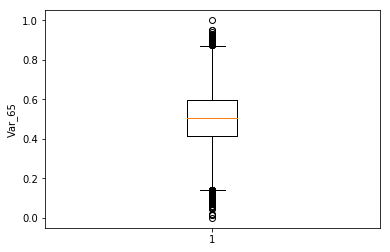

In [52]:
plt.boxplot(data['var_65'])
plt.ylabel('Var_65')

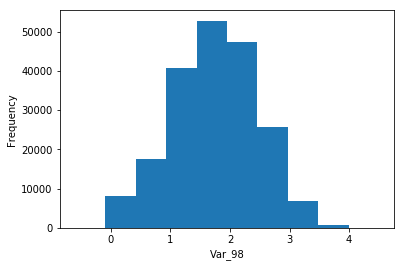

In [12]:
plt.hist(data['var_98'], bins = 10)
plt.ylabel('Frequency')
plt.xlabel('Var_98')
plt.show()

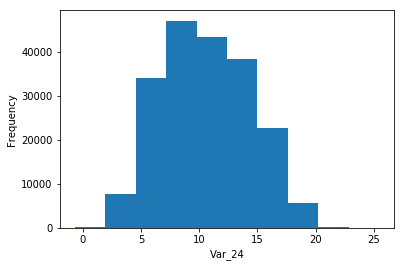

In [13]:
plt.hist(data['var_24'], bins = 10)
plt.ylabel('Frequency')
plt.xlabel('Var_24')
plt.show()

In [14]:
#Dropping ID_code column from the data
data = data.drop('ID_code', axis=1)

In [15]:
data.shape

(200000, 201)

# Feature Scaling

In [16]:
# Normalization of the features
cnames = data.columns.drop('target')
for i in cnames:

    data[i]= (data[i] - np.min(data[i]))/(np.max(data[i]) -np. min(data[i]))

In [17]:
data.head(10)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,0.427853,0.324824,0.568059,0.388041,0.550670,0.467321,0.454298,0.594255,0.270395,...,0.569515,0.342943,0.568958,0.448173,0.510975,0.300318,0.678981,0.430958,0.327658,0.560645
1,0,0.557212,0.428639,0.681235,0.410417,0.628408,0.795072,0.536604,0.500584,0.660911,...,0.668079,0.536531,0.523717,0.756190,0.350211,0.765154,0.686614,0.468277,0.609546,0.605827
2,0,0.411969,0.483777,0.578061,0.599690,0.474941,0.471329,0.753295,0.414724,0.270429,...,0.522496,0.643141,0.448960,0.448000,0.671183,0.881350,0.236337,0.381950,0.425833,0.582736
3,0,0.535099,0.507140,0.396562,0.546993,0.647586,0.616822,0.572995,0.428577,0.224846,...,0.570474,0.383085,0.370986,0.439205,0.745555,0.418549,0.346810,0.717176,0.590016,0.443232
4,0,0.473637,0.533434,0.624133,0.504796,0.621079,0.702836,0.589011,0.622220,0.811883,...,0.387371,0.629275,0.299888,0.697737,0.238801,0.393218,0.557507,0.586526,0.591416,0.446041
5,0,0.555991,0.500594,0.608666,0.655146,0.507675,0.725165,0.358157,0.442026,0.682148,...,0.239333,0.478880,0.745336,0.406573,0.324980,0.660003,0.325396,0.630220,0.317577,0.506174
6,0,0.572710,0.588516,0.419607,0.327460,0.522627,0.492687,0.630909,0.301109,0.296629,...,0.703146,0.471131,0.601380,0.397839,0.501029,0.613128,0.716852,0.522153,0.231934,0.529194
7,0,0.660565,0.277547,0.682326,0.577443,0.308668,0.670363,0.547784,0.759844,0.753757,...,0.837989,0.476129,0.638877,0.585045,0.751066,0.512214,0.566455,0.573380,0.119470,0.628526
8,0,0.788618,0.687878,0.685407,0.428839,0.321353,0.777401,0.344912,0.216439,0.354232,...,0.477132,0.898728,0.446431,0.439096,0.319355,0.342672,0.403807,0.370360,0.667959,0.648787
9,0,0.607859,0.669456,0.393301,0.415089,0.735517,0.326748,0.609206,0.514334,0.514804,...,0.450222,0.464118,0.397122,0.514612,0.319220,0.598674,0.871114,0.323305,0.502442,0.788440


# Feature selection 

In [18]:
# Standardisation of the Features
scaler=StandardScaler()
scaler.fit(data.iloc[:,1:])
data_std=pd.DataFrame(scaler.transform(data.iloc[:,1:]))

In [50]:
from sklearn.decomposition import PCA
PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

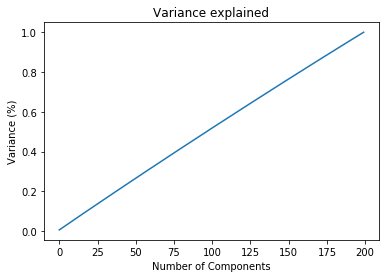

In [51]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_std)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Variance explained')
plt.show()

In [21]:
# Principle Component Analysis
pca = PCA(n_components=200)
principalComponents = pca.fit_transform(data_std)
principalDf = pd.DataFrame(data = principalComponents)

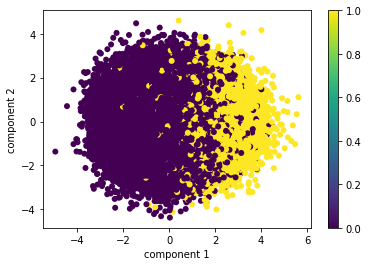

In [57]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            c=data['target'], edgecolor='none', alpha=2)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [22]:
finalDf = pd.concat([principalDf, data[['target']]], axis = 1)

In [23]:
finalDf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,target
0,-0.444408,0.132164,-0.375635,-1.129709,-0.599821,-0.634828,0.565213,-1.155620,-0.990219,-0.175564,...,1.508709,0.977069,2.045745,0.201152,-1.106815,0.361240,0.561046,-0.019785,0.866938,0
1,2.210684,-0.296311,0.237342,0.714799,-0.036654,-1.080302,-0.594223,0.498450,1.546303,0.000320,...,-0.094403,-1.013817,0.909669,0.579820,1.325959,-0.650271,-1.503024,-0.936695,-1.548114,0
2,-0.065663,-0.114418,-2.040499,-0.079453,-0.539141,-0.255349,-0.766792,0.039588,-1.225756,-1.642046,...,-1.500747,0.454787,0.162458,-0.527852,0.391740,-0.350006,1.181877,-0.169317,0.099085,0
3,1.368927,-0.158433,1.045341,-0.813844,-0.749953,-0.386691,-0.343478,0.684591,-1.147571,-0.202547,...,-0.445056,-1.753661,-0.184288,-0.111849,0.704550,-0.095552,-2.008669,-1.380435,0.687273,0
4,0.552394,0.895515,0.799550,-0.545836,0.686037,0.444611,0.653152,0.945732,1.348686,-0.156881,...,0.286693,0.086655,0.969687,0.904570,-0.219856,0.366587,0.167972,0.105059,0.099719,0
5,0.466084,0.481655,1.193415,-0.562924,1.567612,1.009622,-0.742718,0.526360,0.184722,-0.794015,...,-0.383762,-0.442301,-0.843509,-1.239219,-0.252890,-0.085936,0.113485,0.994638,1.341539,0
6,1.719187,1.250523,-0.046094,0.754203,0.244874,-0.968139,-1.885762,-0.342155,-0.591513,-1.463328,...,-1.368753,-1.303027,-0.580558,0.369951,-0.700666,0.839014,0.338570,0.779321,0.799798,0
7,0.229816,1.750444,-0.908387,0.046011,0.714664,1.714507,-0.442409,-0.508227,0.466648,0.416474,...,-0.442647,2.176644,-0.226419,0.527867,0.382434,-0.462791,1.101150,0.402571,0.931407,0
8,-0.063997,-1.403546,-0.086834,-0.968416,-2.116395,-1.328875,-0.261847,0.459334,-0.242657,-0.273404,...,-0.087601,1.552952,-1.283724,1.792381,-0.511585,-0.562984,0.489984,-2.007905,-1.864542,0
9,0.494067,-0.908523,-1.534201,0.888578,0.444211,-0.392553,-0.573177,0.058758,0.335166,-0.963717,...,-0.493773,-0.395641,-0.376814,-1.470149,2.094699,0.142609,-1.737389,0.758496,-0.393439,0


# Sampling

In [24]:
# Dividing the data into Test and Train
train, test = train_test_split(finalDf, test_size = 0.25, random_state = 35)

In [25]:
train.shape

(150000, 201)

# Model Building

# Logistic Regression

In [27]:
#Built Logistic Regression
logit = sm.Logit(train['target'], train.iloc[:,0:200]).fit(method='bfgs')
logit.summary()

Optimization terminated successfully.
         Current function value: 0.659177
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149800
Method:                           MLE   Df Model:                          199
Date:                Wed, 17 Jul 2019   Pseudo R-squ.:                  -1.022
Time:                        22:20:45   Log-Likelihood:                -98877.
converged:                       True   LL-Null:                       -48905.
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.4906      0.005     94.527      0.000       0.480       0.501
1              0.0058      0.005      1.111      0.266      -0.004       0.016
2              0.0040      0.005      0.778      0.436      -0.006       0.014
3             -0.0026      0.005     -0.510      0.610      -0.013       0.008
4              0.0007      0.005      0.135      0.893      -0.009       0.011
5              0.0039      0.005      0.753      0.452      -0.006       0.014
6             -0.0028      0.005     -0.547      0.585      -0.013       0.007
7             -0.0107      0.005     -2.047      0.041      -0.021      -0.000
8              0.0134      0.005      2.573      0.010       0.003       0.024
9              0.0084      0.005      1.615      0.106      -0.002       0.019
10             0.0008      0.005      0.151      0.880      -0.009       0.011
11             0.0017      0.005      0.329      0.742      -0.009       0.012
12             0.0120      0.005      2.289      0.022       0.002       0.022
13             0.0015      0.005      0.295      0.768      -0.009       0.012
14             0.0025      0.005      0.486      0.627      -0.008       0.013
15            -0.0072      0.005     -1.371      0.170      -0.017       0.003
16             0.0126      0.005      2.416      0.016       0.002       0.023
17             0.0044      0.005      0.842      0.400      -0.006       0.015
18             0.0064      0.005      1.221      0.222      -0.004       0.017
19             0.0001      0.005      0.022      0.982      -0.010       0.010
20             0.0039      0.005      0.753      0.452      -0.006       0.014
21            -0.0011      0.005     -0.217      0.828      -0.011       0.009
22            -0.0075      0.005     -1.423      0.155      -0.018       0.003
23            -0.0111      0.005     -2.119      0.034      -0.021      -0.001
24            -0.0028      0.005     -0.536      0.592      -0.013       0.007
25             0.0053      0.005      1.005      0.315      -0.005       0.016
26            -0.0013      0.005     -0.243      0.808      -0.012       0.009
27            -0.0074      0.005     -1.402      0.161      -0.018       0.003
28            -0.0047      0.005     -0.887      0.375      -0.015       0.006
29            -0.0110      0.005     -2.093      0.036      -0.021      -0.001
30          3.212e-05      0.005      0.006      0.995      -0.010       0.010
31            -0.0028      0.005     -0.536      0.592      -0.013       0.007
32             0.0013      0.005      0.244      0.807      -0.009       0.012
33            -0.0107      0.005     -2.024      0.043      -0.021      -0.000
34             0.0134      0.005      2.553      0.011       0.003       0.024
35             0.0009      0.005      0.162      0.871      -0.009       0.011
36             0.0017      0.005      0.317      0.751      -0.009       0.012
37            -0.0034      0.005     -0.655      0.512      -0.014       0.007
38

In [28]:
#Predict test data
test['pred_prob'] = logit.predict(test.iloc[:,0:200])
test['Log_Predictions'] = 1
test.loc[test.pred_prob < 0.5, 'Log_Predictions'] = 0

C:\Users\M.PAVITHRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\M.PAVITHRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\M.PAVITHRA\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [29]:
#Build confusion matrix
CM = pd.crosstab(test['target'], test['Log_Predictions'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)
#Accuracy = 58.014%

59.71

In [30]:
#Precision
(TP*100)/(FP+TP)
#Precision = 18.88% 

18.882299645828187

# XG Boost Model

In [35]:
#XGBoost model
XG_model = xgb.XGBClassifier(objective = "binary:logistic", random_state = 42)
XG_model.fit(train.iloc[:,0:200], train['target'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [36]:
#predict test cases
XG_Predictions = XG_model.predict(test.iloc[:,0:200])

In [37]:
#build confusion matrix
CM = pd.crosstab(test['target'], XG_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)
#Accuracy = 91.486%

91.486

In [38]:
#Precision
(TP*100)/(FP+TP)
#Precision = 70.0%

70.0

# Naive Bayes Classification

In [169]:
#Naive Bayes
#Naive Bayes implementation
NB_model = GaussianNB().fit(train.iloc[:,0:200], train['target'])

In [170]:
#predict test cases
NB_Predictions = NB_model.predict(test.iloc[:,0:200])

In [171]:
#build confusion matrix
CM = pd.crosstab(test['target'], NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)
#Accuracy = 91.856%

91.856

In [172]:
#Precision
(TP*100)/(FP+TP)
#Precision = 70.6135%

70.61347061347061

# Decision Tree

In [138]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(train.iloc[:,0:200], train['target'])

#predict new test cases
C50_Predictions = C50_model.predict(test.iloc[:,0:200])

In [139]:
#build confusion matrix
CM = pd.crosstab(test['target'], C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)
#Accuracy = 84.78%

84.78

In [140]:
#Precision
(TP*100)/(FP+TP)
#Precision = 25.21%

25.206850105830288

# Random Forest

In [141]:
#Random Forest
RF_model = RandomForestClassifier(n_estimators = 20).fit(train.iloc[:,0:200], train['target'])

In [142]:
RF_Predictions = RF_model.predict(test.iloc[:,0:200])

In [143]:
#build confusion matrix
CM = pd.crosstab(test['target'], RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)
#Accuracy = 90.07%

90.066

In [144]:
#Precision
(TP*100)/(FP+TP)
#Precision = 52.58%

52.582159624413144

# Predicting the Test Data

In [39]:
# Reading the test data
data_test = pd.read_csv("test.csv")

In [40]:
data_test.columns

Index(['ID_code', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5',
       'var_6', 'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [41]:
data_test = data_test.drop('ID_code', axis=1)

In [42]:
# Normalization
cnames_test = data_test.columns
for i in cnames_test:

    data_test[i]= (data_test[i] - np.min(data_test[i]))/(np.max(data_test[i]) - np. min(data_test[i]))

In [44]:
# Standardisation of the Features
scaler_test=StandardScaler()
scaler.fit(data_test.iloc[:,0:])
data_test_std=pd.DataFrame(scaler.transform(data_test.iloc[:,0:]))

In [45]:
# Principle Component Analysis
pca_test = PCA(n_components=200)
principalComponents_test = pca.fit_transform(data_test_std)
principalDf_test = pd.DataFrame(data = principalComponents_test)

In [46]:
# Using XG Boost model for Prediction
data_test['Predictions'] = XG_model.predict(principalDf_test)

In [47]:
data_test.shape

(200000, 201)

In [48]:
data_test.head(20)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,Predictions
0,0.491396,0.934286,0.647868,0.717967,0.563676,0.563885,0.596918,0.555992,0.616146,0.675517,...,0.745496,0.168422,0.477313,0.233148,0.780223,0.613081,0.745210,0.445426,0.456290,0
1,0.376861,0.667159,0.547072,0.395628,0.351853,0.527653,0.624899,0.572118,0.282491,0.255995,...,0.587858,0.377335,0.741635,0.333622,0.569846,0.417179,0.606236,0.628698,0.274352,0
2,0.239172,0.191796,0.475918,0.537077,0.452813,0.834554,0.440118,0.643958,0.585037,0.606615,...,0.700735,0.468998,0.467990,0.193832,0.744399,0.228884,0.146114,0.667101,0.241644,0
3,0.377177,0.561688,0.590920,0.501147,0.318535,0.687271,0.447462,0.657790,0.679433,0.475497,...,0.600497,0.440591,0.516235,0.312664,0.854102,0.599396,0.501114,0.322375,0.523223,0
4,0.520319,0.610381,0.719749,0.590456,0.342955,0.426075,0.762902,0.216621,0.659735,0.429034,...,0.605501,0.407583,0.509229,0.547880,0.489135,0.294091,0.183191,0.367939,0.449389,0
5,0.261919,0.522017,0.382092,0.538642,0.830318,0.424047,0.333596,0.400791,0.603165,0.449817,...,0.498068,0.257009,0.698596,0.299542,0.285155,0.265224,0.596459,0.527638,0.746406,0
6,0.373789,0.365839,0.305956,0.629356,0.618420,0.456672,0.320501,0.326284,0.288235,0.306909,...,0.484906,0.655567,0.697573,0.437285,0.522496,0.726220,0.488241,0.595839,0.662177,0
7,0.773211,0.516700,0.675088,0.639771,0.530035,0.830993,0.615041,0.537400,0.262426,0.476458,...,0.357069,0.376453,0.444558,0.316833,0.329777,0.685614,0.706806,0.845884,0.596541,0
8,0.307070,0.650208,0.694478,0.364415,0.302671,0.311108,0.348696,0.392868,0.639314,0.440543,...,0.537684,0.512141,0.391690,0.394915,0.532287,0.418933,0.614310,0.521314,0.536292,0
9,0.460472,0.331932,0.752728,0.692512,0.608508,0.376831,0.202823,0.645194,0.435481,0.369333,...,0.704855,0.372963,0.557091,0.310245,0.583613,0.318082,0.558318,0.462585,0.724462,0
